In [1]:
import sys, os, h5py
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import rc
from matplotlib import rcParams

rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rcParams['text.usetex'] = True
rcParams['text.latex.unicode'] = True
plt.rcParams.update({'font.size': 20})
rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]

/sw/arcts/centos7/python3.6-anaconda/5.2.0/lib/python3.6/site-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
  # This is added back by InteractiveShellApp.init_path()


findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


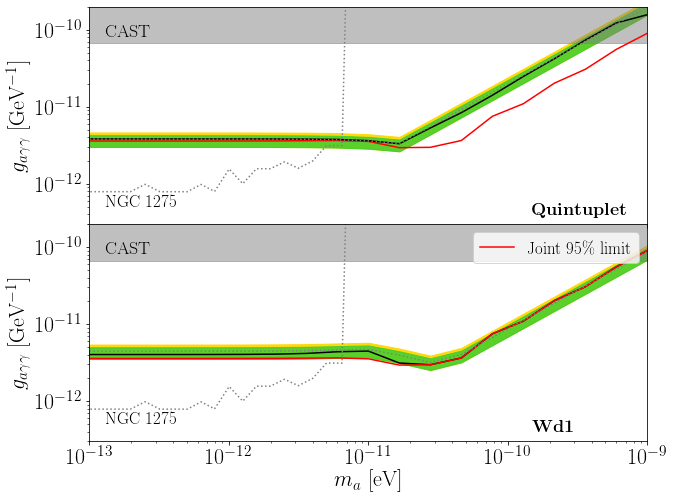

In [2]:
Pers_m, Pers_lims = np.load('../Data/NGC1275_XRayMod.npy')
archive = h5py.File('../Data/Limits.h5', 'r')
fig, axs = plt.subplots(2, sharex=True, sharey=True, gridspec_kw={'hspace': 0},figsize=(10,8))

##############################
###   Quintuplet Results   ###
##############################

axs[0].plot(archive['Masses'], archive['Joint_Limit'], c= 'red')
axs[0].plot(archive['Masses'],archive['Limit_Quint'], 'k-',label="Quintuplet 95\% limit")
axs[0].fill_between(archive['Masses'],archive['OneDn_Quint'], archive['TwoUp_Quint'],
                    color = 'gold', alpha = .95)
axs[0].fill_between(archive['Masses'],archive['OneDn_Quint'], archive['OneUp_Quint'],
                    color = 'limegreen', alpha = .8)

axs[0].plot(archive['Masses'],archive['Median_Quint'],color="grey",
            linestyle="dotted",label="median expected")
axs[0].plot(np.append(Pers_m,np.array([1.1*Pers_m[-1]])), 
            np.append(Pers_lims,np.array([1000*Pers_lims[-1]])),
            color="grey",linestyle="dotted")

axs[0].axhspan(6.67e-11, 1e-8,color="grey",alpha=0.5)

axs[0].set_xscale('log')
axs[0].set_yscale('log')
axs[0].set_xlim(np.min(archive['Masses']),np.max(archive['Masses']))
axs[0].set_xlabel(r"$m_a$ [eV]",fontsize=22)
axs[0].set_ylabel(r"$g_{a\gamma\gamma}$ [GeV$^{-1}$]",fontsize=22)

axs[0].text(1.3e-13,8e-11,r"CAST",fontsize=18)
axs[0].text(1.5e-10,4e-13,r"{\bf Quintuplet}",fontsize=18)

axs[0].tick_params(axis='x', labelsize=22 )
axs[0].tick_params(axis='y', labelsize=22 )

axs[0].text(1.3e-13,5e-13,r"NGC 1275",fontsize=17)
axs[0].set_ylim(3e-13,2e-10)



###############################
###   Westerlund1 Results   ###
###############################
 
axs[1].plot(archive['Masses'], archive['Limit_Wd1'],'k-')
axs[1].plot(archive['Masses'], archive['Joint_Limit'], label="Joint 95\% limit", color = 'red')

axs[1].fill_between(archive['Masses'],archive['OneDn_Wd1'],archive['TwoUp_Wd1'],color="gold",alpha=0.95)
axs[1].fill_between(archive['Masses'],archive['OneDn_Wd1'],archive['OneUp_Wd1'],color="limegreen",alpha=0.8)

axs[1].plot(archive['Masses'],archive['Median_Wd1'],color="grey",linestyle="dotted")
axs[1].plot(np.append(Pers_m,np.array([1.1*Pers_m[-1]])),
            np.append(Pers_lims,np.array([1000*Pers_lims[-1]])),
            color="grey",linestyle="dotted")

axs[1].axhspan(6.67e-11, 1e-8,color="grey",alpha=0.5)

axs[1].set_xlim(np.min(archive['Masses']),np.max(archive['Masses']))
axs[1].set_ylim(3e-13,2e-10)

axs[1].set_xscale('log')
axs[1].set_yscale('log')

axs[1].legend(fontsize=17,loc=1)

axs[1].set_xlabel(r"$m_a$ [eV]",fontsize=22)
axs[1].set_ylabel(r"$g_{a\gamma\gamma}$ [GeV$^{-1}$]",fontsize=22)
axs[1].tick_params(axis='x', labelsize=22 )
axs[1].tick_params(axis='y', labelsize=22 )

axs[1].text(1.3e-13,5e-13,r"NGC 1275",fontsize=17)

axs[1].text(1.3e-13,8e-11,r"CAST",fontsize=18)
axs[1].text(1.5e-10,4e-13,r"{\bf Wd1}",fontsize=18)

plt.savefig('../Plots/Fig3.pdf')
plt.savefig('../Plots/Fig3.png')
plt.show()

archive.close()

## Spectra plot

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


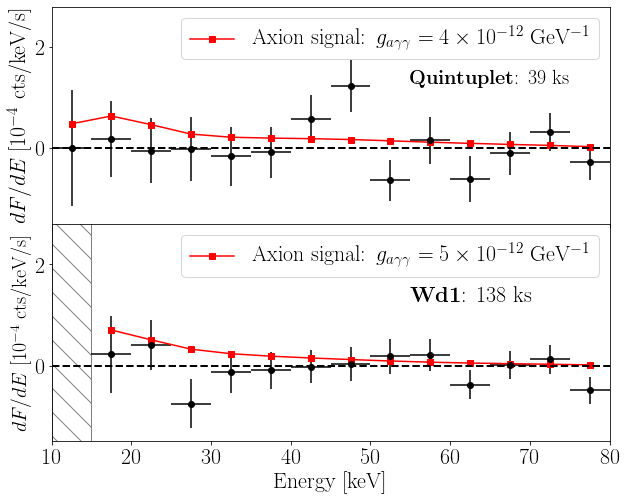

In [3]:
archive = h5py.File('../Data/Spectra.h5', 'r')


fig, axs = plt.subplots(2, sharex=True, sharey=True, gridspec_kw={'hspace': 0},figsize=(10,8))


######################
###   Quintuplet   ###
######################

axs[0].errorbar(archive['Energies'],archive['Quintuplet_Spectrum'], yerr = archive['Quintuplet_Spectrum_Err'],
                xerr = archive['Quintuplet_Spectrum_Width'],fmt="o",color="black")

axs[0].plot(archive['Energies'][1:], archive['Quintuplet_Axion'][1:], '-s', c = 'red', 
         label = r'Axion signal: $g_{a\gamma\gamma} = 4 \times 10^{-12}$ GeV$^{-1}$') #*(sig_frac - bkg_frac)


axs[0].axhline(0., c = 'black', ls = '--', lw = 2)
axs[0].set_xlabel('Energy [keV]', fontsize = 22)
axs[0].set_ylabel(r'$dF/dE$ [$10^{-4}$ cts/keV/s]', fontsize = 22)

axs[0].set_xlim(10, 80)
axs[0].set_ylim(-1.5, 2.8)
axs[0].tick_params(axis='x', labelsize=22 )
axs[0].tick_params(axis='y', labelsize=22 )
axs[0].legend(loc=1,fontsize=22)
axs[0].text(55,1.25,r"{\bf Quintuplet}: 39 ks",fontsize=20)

#######################
###   Westerlund1   ###
#######################

axs[1].errorbar(archive['Energies'],archive['Wd1_Spectrum'], yerr = archive['Wd1_Spectrum_Err'],
                xerr = archive['Wd1_Spectrum_Width'],fmt="o",color="black")

axs[1].plot(archive['Energies'][2:], archive['Wd1_Axion'][2:], '-s', c = 'red', 
         label = r'Axion signal: $g_{a\gamma\gamma} = 5 \times 10^{-12}$ GeV$^{-1}$') #*(sig_frac - bkg_frac)


axs[1].axhline(0., c = 'black', ls = '--', lw = 2)
axs[1].set_xlabel('Energy [keV]', fontsize = 22)
axs[1].set_ylabel(r'$dF/dE$ [$10^{-4}$ cts/keV/s]', fontsize = 20)

axs[1].set_xlim(10, 80)
axs[1].set_ylim(-1.5,2.8)
axs[1].tick_params(axis='x', labelsize=22 )
axs[1].tick_params(axis='y', labelsize=22 )
axs[1].legend(loc=1,fontsize=22)
axs[1].text(55,1.25,r"{\bf Wd1}: 138 ks",fontsize=22)
axs[1].fill([10, 15, 15, 10], [-5, -5, 10.0, 10.0], fill=False, hatch='\\',color="grey")

archive.close()


plt.savefig('../Plots/Fig2.pdf',bbox_inches="tight")
plt.show()